In [1]:
import pandas as pd

# Merging all the years

In [2]:
pd_2014 = pd.read_csv('2014.csv')
pd_2015 = pd.read_csv('2015.csv')
pd_2016 = pd.read_csv('2016.csv')
pd_2017 = pd.read_csv('2017.csv')
pd_2018 = pd.read_csv('2018.csv')

In [3]:
data = pd.concat([pd_2014,pd_2015,pd_2016,pd_2017,pd_2018], axis=0)
data.shape

(794599, 25)

# Dropping Nan Values

In [4]:
new_data = data.dropna(axis = 0, how ='any')
new_data.shape

(406758, 25)

In [8]:
new_data.head()

,FITXA_ID,TIPUS,AREA,ELEMENT,DETALL,DIA_DATA_ALTA,MES_DATA_ALTA,ANY_DATA_ALTA,DIA_DATA_TANCAMENT,MES_DATA_TANCAMENT,...,SECCIO_CENSAL,TIPUS_VIA,CARRER,NUMERO,COORDENADA_X,COORDENADA_Y,LONGITUD,LATITUD,SUPORT,CANALS_RESPOSTA
0,3,INCIDENCIA,Recollida i neteja de l'espai urbà,Neteja carrers i/o places,Objectes a netejar / retirar,31,12,2013,1,1,...,66.0,Passatge,Pere Ripoll,9.0,433035.1772,4583849.857,2.198861,41.403403,TELÈFON,NO VOL RESPOSTA
1,4,INCIDENCIA,Recollida i neteja de l'espai urbà,Neteja carrers i/o places,Neteja de carrers o places (ús app),31,12,2013,1,1,...,33.0,Avinguda,Madrid,161.0,427407.7929,4581395.824,2.131839,41.380812,MÒBIL,EMAIL
2,2,INCIDENCIA,Recollida i neteja de l'espai urbà,Neteja carrers i/o places,Objectes a netejar / retirar,31,12,2013,1,1,...,105.0,Carrer,Feliu i Codina,80.0,430086.6035,4587527.654,2.163164,41.436276,TELÈFON,NO VOL RESPOSTA
3,5,INCIDENCIA,Recollida i neteja de l'espai urbà,Neteja carrers i/o places,"Orins, excrements humans",1,1,2014,1,1,...,89.0,Carrer,Rosés,59.0,427558.3272,4581149.141,2.133668,41.378604,TELÈFON,SMS
4,1,INCIDENCIA,Recollida i neteja de l'espai urbà,Neteja carrers i/o places,Objectes a netejar / retirar,1,1,2014,1,1,...,110.0,Carrer,Perafita,4.0,430754.3104,4590140.388,2.170856,41.459866,TELÈFON,EMAIL


In [32]:
codi_barri= new_data[['BARRI','CODI_BARRI']].drop_duplicates()

In [33]:
pd.to_numeric(codi_barri['CODI_BARRI'])

0         68.0
1         19.0
2         43.0
3         18.0
4         55.0
          ... 
1794      47.0
2134      42.0
2328      58.0
140       11.0
102478    11.0
Name: CODI_BARRI, Length: 75, dtype: float64

In [40]:
print(codi_barri.sort_values(['CODI_BARRI']))

                                            BARRI  CODI_BARRI
19                                       el Raval         1.0
26                                 el Barri Gòtic         2.0
445                                la Barceloneta         3.0
30          Sant Pere, Santa Caterina i la Ribera         4.0
222                                 el Fort Pienc         5.0
..                                            ...         ...
169  Diagonal Mar i el Front Marítim del Poblenou        69.0
219                         el Besòs i el Maresme        70.0
36                        Provençals del Poblenou        71.0
69                       Sant Martí de Provençals        72.0
533                           la Verneda i la Pau        73.0

[75 rows x 2 columns]


In [15]:
new_data[new_data['BARRI'== el Raval]

SyntaxError: invalid syntax (<ipython-input-15-6d47a8869c6a>, line 1)

In [6]:
#new_data.to_excel("new_data.xlsx")

# Data pre-processing

In [7]:
# Checking Categorical Data
obj = new_data.select_dtypes(include=['object']).columns
inte = new_data.select_dtypes(include=['int64','float64']).columns
bol = new_data.select_dtypes(include=['bool']).columns
print(obj)
print(inte)
print(bol)

Index(['TIPUS', 'AREA', 'ELEMENT', 'DETALL', 'DISTRICTE', 'BARRI', 'TIPUS_VIA',
       'CARRER', 'SUPORT', 'CANALS_RESPOSTA'],
      dtype='object')
Index(['FITXA_ID', 'DIA_DATA_ALTA', 'MES_DATA_ALTA', 'ANY_DATA_ALTA',
       'DIA_DATA_TANCAMENT', 'MES_DATA_TANCAMENT', 'ANY_DATA_TANCAMENT',
       'CODI_DISTRICTE', 'CODI_BARRI', 'SECCIO_CENSAL', 'NUMERO',
       'COORDENADA_X', 'COORDENADA_Y', 'LONGITUD', 'LATITUD'],
      dtype='object')
Index([], dtype='object')


In [8]:
new_data.isnull().sum()

FITXA_ID              0
TIPUS                 0
AREA                  0
ELEMENT               0
DETALL                0
DIA_DATA_ALTA         0
MES_DATA_ALTA         0
ANY_DATA_ALTA         0
DIA_DATA_TANCAMENT    0
MES_DATA_TANCAMENT    0
ANY_DATA_TANCAMENT    0
CODI_DISTRICTE        0
DISTRICTE             0
CODI_BARRI            0
BARRI                 0
SECCIO_CENSAL         0
TIPUS_VIA             0
CARRER                0
NUMERO                0
COORDENADA_X          0
COORDENADA_Y          0
LONGITUD              0
LATITUD               0
SUPORT                0
CANALS_RESPOSTA       0
dtype: int64

In [9]:
droplist = ['DIA_DATA_TANCAMENT','MES_DATA_TANCAMENT','ANY_DATA_TANCAMENT','CODI_DISTRICTE','CODI_BARRI','SECCIO_CENSAL','COORDENADA_X','COORDENADA_Y']

Concatenate DIA-MES-ANY-BARRI-SUPPORT
this is made to notice the differences between rows

In [10]:
new_data['concat'] = new_data['DIA_DATA_ALTA'].map(str)+'-'+new_data['MES_DATA_ALTA'].map(str)+'-'+new_data['ANY_DATA_ALTA'].map(str)+'-'+new_data['BARRI']+'-'+new_data['SUPORT']

C:\Users\alex1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# A) Categorical Data Analysis

## 1) TIPUS Analysis

In [11]:
new_data['TIPUS'].value_counts()

INCIDENCIA           310652
QUEIXA                52814
SUGGERIMENT           39272
PETICIO DE SERVEI      4020
Name: TIPUS, dtype: int64

Checking on similar data for detall

In [12]:
neteja_df = new_data[new_data['DETALL'].str.contains("neteja")]

In [13]:
neteja_df['concat'].value_counts()

6-7-2018-el Raval-TELÈFON                          12
28-6-2017-el Raval-TELÈFON                         12
3-8-2017-el Raval-MÒBIL                            12
9-10-2018-el Raval-TELÈFON                         11
28-9-2018-el Parc i la Llacuna del Poblenou-WEB    10
                                                   ..
4-9-2018-la Dreta de l'Eixample-WEB                 1
21-10-2016-el Besòs i el Maresme-TELÈFON            1
10-1-2014-la Font de la Guatlla-WEB                 1
15-11-2018-Horta-INSTÀNCIA                          1
26-11-2018-Horta-WEB                                1
Name: concat, Length: 41764, dtype: int64

In [14]:
plaga_df = new_data[new_data['DETALL'].str.contains("plaga")]

In [15]:
plaga_df['concat'].value_counts()

7-7-2015-Sant Martí de Provençals-TELÈFON                        94
7-7-2015-Diagonal Mar i el Front Marítim del Poblenou-TELÈFON    48
8-7-2015-Sant Martí de Provençals-TELÈFON                        47
6-7-2015-Sant Martí de Provençals-TELÈFON                        45
6-7-2015-Diagonal Mar i el Front Marítim del Poblenou-TELÈFON    36
                                                                 ..
22-5-2015-Sant Gervasi - la Bonanova-TELÈFON                      1
4-7-2017-el Fort Pienc-TELÈFON                                    1
24-1-2018-la Salut-WEB                                            1
10-10-2017-la Guineueta-TELÈFON                                   1
10-11-2015-Diagonal Mar i el Front Marítim del Poblenou-WEB       1
Name: concat, Length: 7175, dtype: int64

In [16]:
enllumenat_df = new_data[new_data['DETALL'].str.contains("Enllumenat")]

In [17]:
enllumenat_df['concat'].value_counts()

14-5-2017-el Raval-WEB                                  22
14-5-2017-Sant Pere, Santa Caterina i la Ribera-WEB     22
15-10-2017-Sant Pere, Santa Caterina i la Ribera-WEB    19
8-10-2017-el Poble-sec-WEB                              17
19-10-2017-la Dreta de l'Eixample-WEB                   16
                                                        ..
21-12-2015-Sarrià-TELÈFON                                1
21-4-2017-el Fort Pienc-WEB                              1
2-6-2014-la Prosperitat-TELÈFON                          1
11-5-2018-la Maternitat i Sant Ramon-ALTRES SUPORTS      1
10-2-2015-Torre Baró-TELÈFON                             1
Name: concat, Length: 22281, dtype: int64

Selecting only Tipus = Incidencia and Queixa

In [18]:
new_data_2 = new_data[(new_data['TIPUS']!='PETICIO DE SERVEI') & (new_data['TIPUS']!='SUGGERIMENT')]

In [19]:
new_data_2['TIPUS'].value_counts()

INCIDENCIA    310652
QUEIXA         52814
Name: TIPUS, dtype: int64

In [20]:
new_data_2['ELEMENT'].value_counts()

Neteja carrers i/o places                           68615
Arbrat                                              36823
Voreres                                             28018
Enllumenat públic                                   27098
Servei de vigilància i control de plagues           17505
                                                    ...  
Ateneus de fabricació                                   2
Eleccions                                               2
Salut ambiental i llei del tabac                        2
Recollida selectiva porta a porta                       1
Passi acompanyant per persones amb discapacitats        1
Name: ELEMENT, Length: 99, dtype: int64

Addding the treshold for the "ELEMENT" - taking out elements that appaear below (treshold) times

In [21]:
new_data_3 = new_data_2[new_data_2['ELEMENT'].map(new_data_2['ELEMENT'].value_counts()) > 100]

In [22]:
new_data_3['TIPUS'].value_counts()

INCIDENCIA    309963
QUEIXA         52482
Name: TIPUS, dtype: int64

In [23]:
new_data_3.shape

(362445, 26)

In [24]:
new_data_3['AREA'].value_counts()

Manteniment de l'espai urbà                 171891
Recollida i neteja de l'espai urbà          134621
Sanitat i salut pública                      20037
Mobilitat                                    18961
Urbanisme, obres i habitatge                  7903
Prevenció i seguretat                         6684
Transports públics                            1151
Nadal                                          667
Informació, tràmits i atenció al ciutadà       530
Name: AREA, dtype: int64

In [25]:
final_df = new_data_3.drop(droplist, axis=1)

In [26]:
final_df.drop('FITXA_ID',axis=1,inplace=True)

### FINAL DATASET

In [27]:
final_df.head()

,TIPUS,AREA,ELEMENT,DETALL,DIA_DATA_ALTA,MES_DATA_ALTA,ANY_DATA_ALTA,DISTRICTE,BARRI,TIPUS_VIA,CARRER,NUMERO,LONGITUD,LATITUD,SUPORT,CANALS_RESPOSTA,concat
0,INCIDENCIA,Recollida i neteja de l'espai urbà,Neteja carrers i/o places,Objectes a netejar / retirar,31,12,2013,Sant Martí,el Poblenou,Passatge,Pere Ripoll,9.0,2.198861,41.403403,TELÈFON,NO VOL RESPOSTA,31-12-2013-el Poblenou-TELÈFON
1,INCIDENCIA,Recollida i neteja de l'espai urbà,Neteja carrers i/o places,Neteja de carrers o places (ús app),31,12,2013,Les Corts,les Corts,Avinguda,Madrid,161.0,2.131839,41.380812,MÒBIL,EMAIL,31-12-2013-les Corts-MÒBIL
2,INCIDENCIA,Recollida i neteja de l'espai urbà,Neteja carrers i/o places,Objectes a netejar / retirar,31,12,2013,Horta-Guinardó,Horta,Carrer,Feliu i Codina,80.0,2.163164,41.436276,TELÈFON,NO VOL RESPOSTA,31-12-2013-Horta-TELÈFON
3,INCIDENCIA,Recollida i neteja de l'espai urbà,Neteja carrers i/o places,"Orins, excrements humans",1,1,2014,Sants-Montjuïc,Sants,Carrer,Rosés,59.0,2.133668,41.378604,TELÈFON,SMS,1-1-2014-Sants-TELÈFON
4,INCIDENCIA,Recollida i neteja de l'espai urbà,Neteja carrers i/o places,Objectes a netejar / retirar,1,1,2014,Nou Barris,Ciutat Meridiana,Carrer,Perafita,4.0,2.170856,41.459866,TELÈFON,EMAIL,1-1-2014-Ciutat Meridiana-TELÈFON


In [28]:
final_df.to_excel("final_dataset.xlsx")

In [38]:
new_data_3['freq'] = new_data_3.groupby('TIPUS')['TIPUS'].transform('count')
pivot_any = pd.pivot_table(new_data_3, 'freq', 'ANY_DATA_ALTA', 'TIPUS', aggfunc='count')
pivot_any

C:\Users\alex1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


TIPUS,INCIDENCIA,QUEIXA
ANY_DATA_ALTA,,
2013,672,265
2014,49036,8583
2015,54972,9727
2016,56708,10342
2017,66051,10647
2018,83020,13015


In [31]:
pd_2015= pd_2015[(pd_2015['TIPUS']!='PETICIO DE SERVEI') & (pd_2015['TIPUS']!='SUGGERIMENT') & (pd_2015['TIPUS']!='AGRAIMENT') & (pd_2015['TIPUS']!='CONSULTA')]

In [32]:
pd_2015['freq'] = pd_2015.groupby('TIPUS')['TIPUS'].transform('count')
pivot_mes = pd.pivot_table(pd_2015, 'freq', 'MES_DATA_ALTA', 'TIPUS', aggfunc='count')
pivot_mes

TIPUS,INCIDENCIA,QUEIXA
MES_DATA_ALTA,,
1,4373,1708
2,3796,1544
3,4584,2050
4,4851,1853
5,5173,2016
6,6004,2292
7,9780,2977
8,4773,1578
9,5962,1914


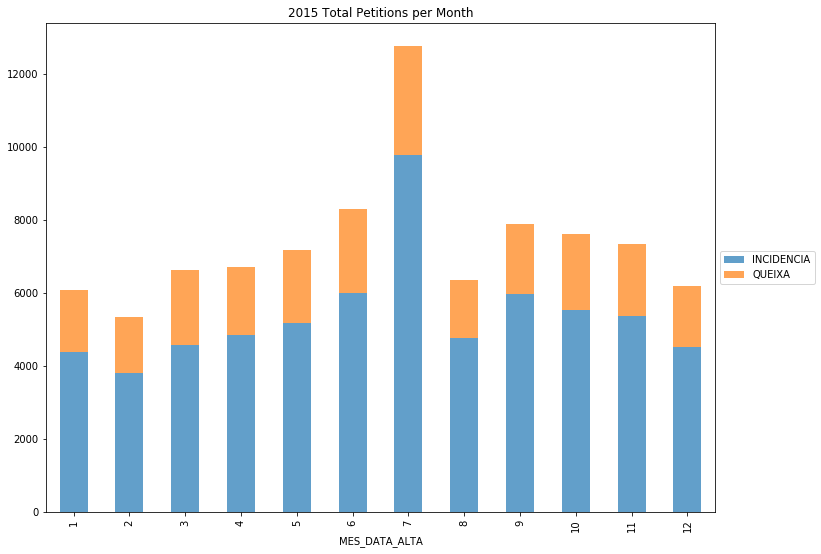

In [33]:
%matplotlib inline 
import matplotlib.pylab as plt

plot1 = pivot_mes.plot(kind='bar',style='b', stacked =True, alpha=0.7,title = "2015 Total Petitions per Month", figsize=(12,9))
plot1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("2015-Month.png",dpi= 300, bbox_inches='tight')
plt.show()


In [34]:
pd_2016= pd_2016[(pd_2016['TIPUS']!='PETICIO DE SERVEI') & (pd_2016['TIPUS']!='SUGGERIMENT') & (pd_2016['TIPUS']!='AGRAIMENT') & (pd_2016['TIPUS']!='CONSULTA')]

In [35]:
pd_2016['freq'] = pd_2016.groupby('TIPUS')['TIPUS'].transform('count')
pivot_mes = pd.pivot_table(pd_2016, 'freq', 'MES_DATA_ALTA', 'TIPUS', aggfunc='count')
pivot_mes

TIPUS,INCIDENCIA,QUEIXA
MES_DATA_ALTA,,
1,5232,1929
2,4678,2064
3,4549,1957
4,5033,2177
5,5335,2325
6,6413,2731
7,6574,3074
8,6130,2024
9,7870,3026


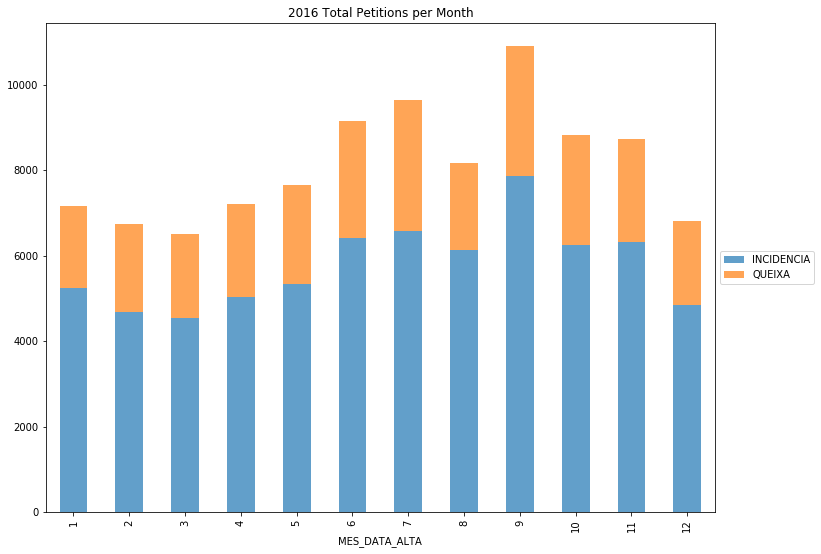

In [36]:
%matplotlib inline 
import matplotlib.pylab as plt

plot1 = pivot_mes.plot(kind='bar',style='b', stacked =True, alpha=0.7,title = "2016 Total Petitions per Month", figsize=(12,9))
plot1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("T2015-Month.png",dpi= 300, bbox_inches='tight')
plt.show()

In [37]:
pd_2017= pd_2017[(pd_2017['TIPUS']!='PETICIO DE SERVEI') & (pd_2017['TIPUS']!='SUGGERIMENT') & (pd_2017['TIPUS']!='AGRAIMENT') & (pd_2017['TIPUS']!='CONSULTA')]

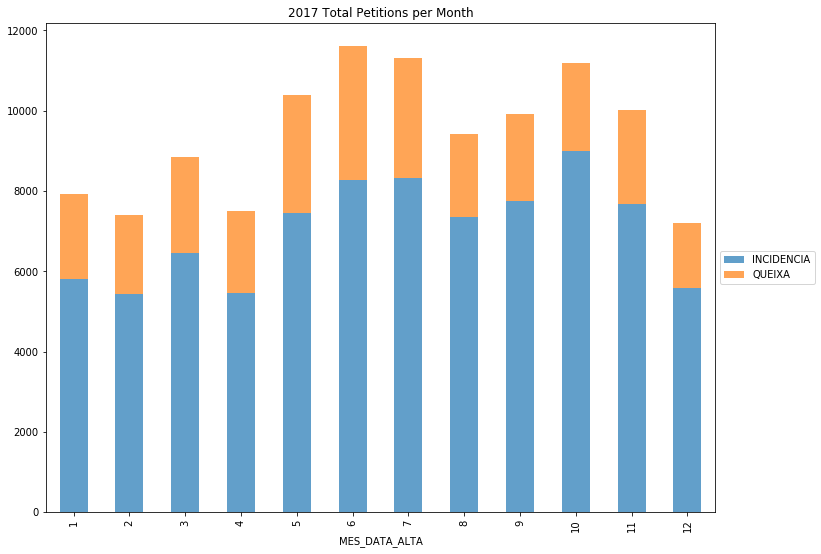

In [38]:
pd_2017['freq'] = pd_2017.groupby('TIPUS')['TIPUS'].transform('count')
pivot_mes = pd.pivot_table(pd_2017, 'freq', 'MES_DATA_ALTA', 'TIPUS', aggfunc='count')
pivot_mes

plot1 = pivot_mes.plot(kind='bar',style='b', stacked =True, alpha=0.7,title = "2017 Total Petitions per Month", figsize=(12,9))
plot1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("2017-Month.png.png",dpi= 300, bbox_inches='tight')
plt.show()

In [39]:
pd_2018= pd_2018[(pd_2018['TIPUS']!='PETICIO DE SERVEI') & (pd_2018['TIPUS']!='SUGGERIMENT') & (pd_2018['TIPUS']!='AGRAIMENT') & (pd_2018['TIPUS']!='CONSULTA')]

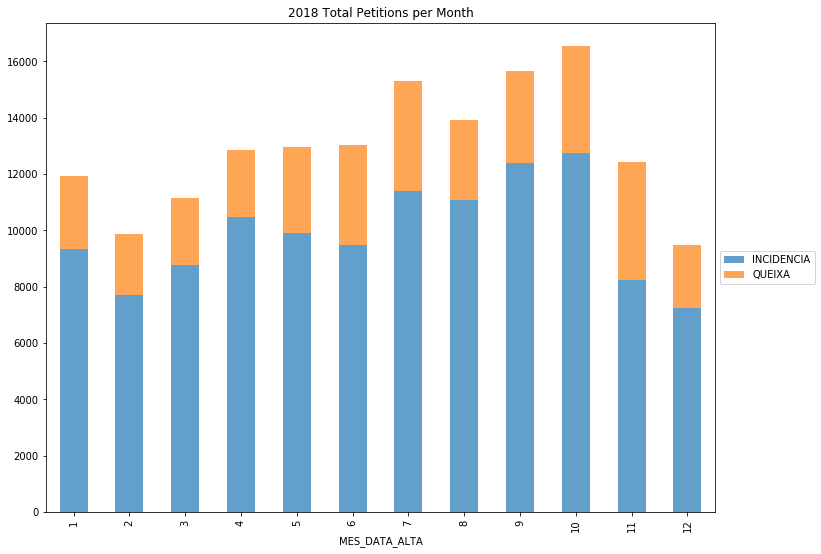

In [40]:
pd_2018['freq'] = pd_2018.groupby('TIPUS')['TIPUS'].transform('count')
pivot_mes = pd.pivot_table(pd_2018, 'freq', 'MES_DATA_ALTA', 'TIPUS', aggfunc='count')
pivot_mes

plot1 = pivot_mes.plot(kind='bar',style='b', stacked =True, alpha=0.7,title = "2018 Total Petitions per Month", figsize=(12,9))
plot1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("2018-Month.png",dpi= 300, bbox_inches='tight')
plt.show()


In [41]:
pd_2014= pd_2014[(pd_2015['TIPUS']!='PETICIO DE SERVEI') & (pd_2014['TIPUS']!='SUGGERIMENT') & (pd_2014['TIPUS']!='AGRAIMENT') & (pd_2014['TIPUS']!='CONSULTA')]

C:\Users\alex1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


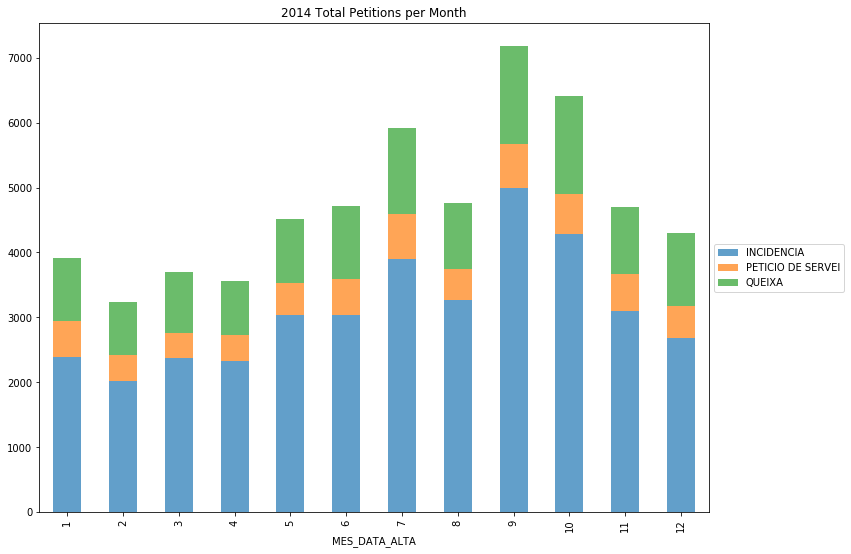

In [42]:
pd_2014['freq'] = pd_2014.groupby('TIPUS')['TIPUS'].transform('count')
pivot_mes = pd.pivot_table(pd_2014, 'freq', 'MES_DATA_ALTA', 'TIPUS', aggfunc='count')
pivot_mes

plot1 = pivot_mes.plot(kind='bar',style='b', stacked =True, alpha=0.7,title = "2014 Total Petitions per Month", figsize=(12,9))
plot1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("2014-Month.png",dpi= 300, bbox_inches='tight')
plt.show()


## 2) Disctricte Analysis

In [40]:
new_data['DISTRICTE'].value_counts()

Sant Martí             64775
Eixample               53610
Horta-Guinardó         48899
Sants-Montjuïc         43682
Nou Barris             40446
Ciutat Vella           37819
Sarrià-Sant Gervasi    36079
Gràcia                 32136
Sant Andreu            31536
Les Corts              17776
Name: DISTRICTE, dtype: int64

In [43]:
pivot_disctricte = pd.pivot_table(new_data_3, 'freq', 'DISTRICTE', 'TIPUS', aggfunc='count')
pivot_disctricte

TIPUS,INCIDENCIA,QUEIXA
DISTRICTE,,
Ciutat Vella,29232,5344
Eixample,39579,7702
Gràcia,23392,4701
Horta-Guinardó,38518,5808
Les Corts,13350,2011
Nou Barris,32834,4339
Sant Andreu,24319,4281
Sant Martí,51155,7453
Sants-Montjuïc,32846,5840


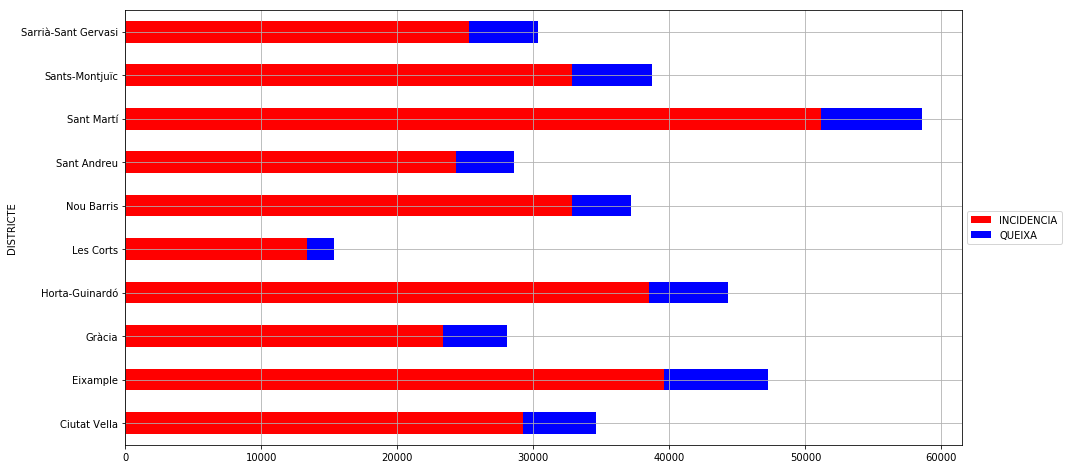

In [44]:
my_colors = ['r', 'b', 'grey', 'gold', 'g','c'] 
ax = pivot_disctricte.plot(kind='barh',stacked=True, color=my_colors,figsize=(15, 8), grid=True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
#plt.savefig("Value_Time_Country.png",dpi= 300, bbox_inches='tight')
plt.show()

In [46]:
new_data_3['freq2'] = new_data_3.groupby('ELEMENT')['ELEMENT'].transform('count')
pivot_disctricte2 = pd.pivot_table(new_data_3, 'freq2', 'DISTRICTE', 'ELEMENT', aggfunc='count')
pivot_disctricte2

C:\Users\alex1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


ELEMENT,Altres obres a la via pública,Arbrat,Ascensors urbans,Autobusos TMB,Bancs,Baranes,Bicicletes,Calçada,Clavegueram,Elements esportius / lleure espai obert,...,Servei de vigilància i control de plagues,Superilles a la ciutat,Tanca,Trànsit,Túnels,Vehicles a motor,Voreres,Xarxa elèctrica / comunicacions privada,Zona bus,Zona gossos
DISTRICTE,,,,,,,,,,,,,,,,,,,,,
Ciutat Vella,549.0,1474.0,2.0,58.0,184.0,35.0,483.0,312.0,796.0,41.0,...,1534.0,3.0,214.0,38.0,NaN,335.0,2103.0,130.0,3.0,104.0
Eixample,955.0,3616.0,12.0,222.0,259.0,57.0,1174.0,797.0,610.0,30.0,...,2246.0,42.0,241.0,116.0,2.0,1324.0,4166.0,197.0,38.0,533.0
Gràcia,822.0,2405.0,7.0,87.0,220.0,92.0,300.0,438.0,387.0,38.0,...,1192.0,5.0,175.0,72.0,3.0,1032.0,1880.0,179.0,5.0,275.0
Horta-Guinardó,613.0,3986.0,1869.0,122.0,333.0,252.0,162.0,575.0,497.0,70.0,...,1733.0,2.0,129.0,68.0,27.0,2392.0,2948.0,266.0,4.0,331.0
Les Corts,343.0,1962.0,4.0,73.0,132.0,22.0,126.0,182.0,221.0,17.0,...,906.0,3.0,68.0,36.0,6.0,690.0,1550.0,61.0,NaN,228.0
Nou Barris,525.0,4246.0,1151.0,122.0,398.0,233.0,125.0,256.0,500.0,42.0,...,2036.0,NaN,107.0,37.0,4.0,1514.0,2666.0,154.0,NaN,246.0
Sant Andreu,503.0,3807.0,189.0,68.0,254.0,57.0,179.0,231.0,351.0,52.0,...,1530.0,1.0,118.0,23.0,1.0,806.0,2259.0,70.0,NaN,214.0
Sant Martí,866.0,9082.0,17.0,219.0,516.0,147.0,585.0,600.0,882.0,119.0,...,3154.0,161.0,270.0,72.0,NaN,2051.0,4746.0,142.0,1.0,675.0
Sants-Montjuïc,788.0,3750.0,301.0,90.0,324.0,162.0,342.0,678.0,675.0,50.0,...,1808.0,5.0,171.0,61.0,9.0,1138.0,2830.0,128.0,4.0,293.0


## 3) Area Analysis

In [49]:
new_data = new_data_3

In [50]:
new_data_3['AREA'].value_counts()

Manteniment de l'espai urbà                 172006
Recollida i neteja de l'espai urbà          134993
Sanitat i salut pública                      20037
Mobilitat                                    19016
Urbanisme, obres i habitatge                  7954
Prevenció i seguretat                         6684
Transports públics                            1151
Nadal                                          667
Informació, tràmits i atenció al ciutadà       530
Name: AREA, dtype: int64

In [51]:
new_data['freq3'] = new_data.groupby('AREA')['AREA'].transform('count')
pivot_any3 = pd.pivot_table(new_data, 'freq3', 'ANY_DATA_ALTA', 'AREA', aggfunc='count')
pivot_any3

C:\Users\alex1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


AREA,"Informació, tràmits i atenció al ciutadà",Manteniment de l'espai urbà,Mobilitat,Nadal,Prevenció i seguretat,Recollida i neteja de l'espai urbà,Sanitat i salut pública,Transports públics,"Urbanisme, obres i habitatge"
ANY_DATA_ALTA,,,,,,,,,
2013,NaN,397.0,85.0,3.0,22.0,241.0,77.0,30.0,82.0
2014,51.0,27283.0,3244.0,142.0,1246.0,20803.0,3075.0,190.0,1585.0
2015,58.0,32053.0,3460.0,112.0,1139.0,23021.0,3180.0,146.0,1530.0
2016,145.0,31504.0,3735.0,128.0,1368.0,24553.0,3933.0,291.0,1393.0
2017,159.0,36775.0,3916.0,159.0,1451.0,28339.0,4134.0,287.0,1478.0
2018,117.0,43994.0,4576.0,123.0,1458.0,38036.0,5638.0,207.0,1886.0


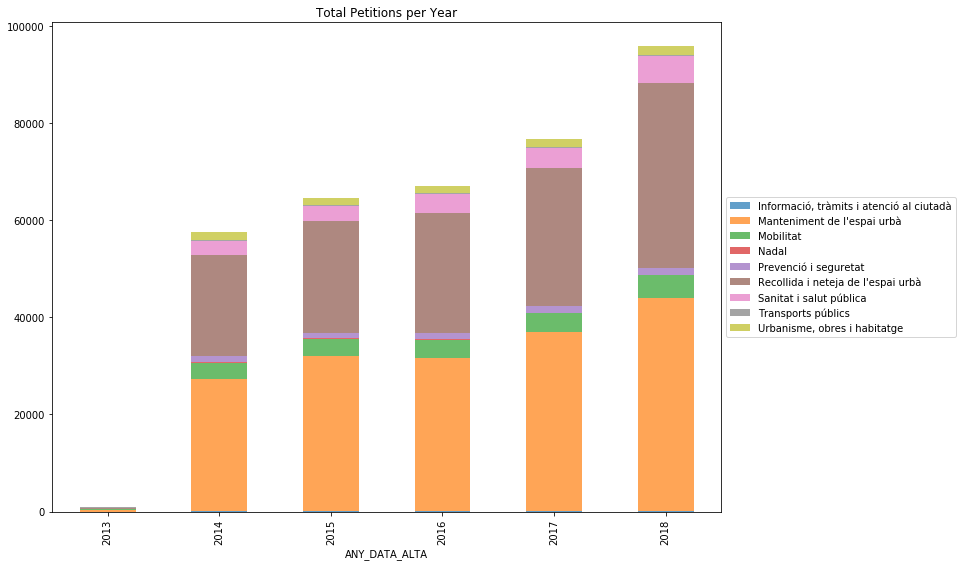

In [52]:
%matplotlib inline 
import matplotlib.pylab as plt

plot1 = pivot_any3.plot(kind='bar',style='b', stacked =True, alpha=0.7,title = "Total Petitions per Year", figsize=(12,9))
plot1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.savefig("Totalvalue_Country.png",dpi= 300, bbox_inches='tight')
plt.show()

## 4) Element Analysis

In [53]:
new_data['ELEMENT'].value_counts()

Neteja carrers i/o places                    68615
Arbrat                                       36823
Voreres                                      28018
Enllumenat públic                            27098
Servei de vigilància i control de plagues    17505
                                             ...  
Escales al carrer                               60
Senyalitzacions                                 56
Túnels                                          55
Zona bus                                        55
Obres metro (línies 3, 5 i 9)                   51
Name: ELEMENT, Length: 77, dtype: int64

## 5) Detall Analysis

In [54]:
new_data['DETALL'].value_counts()

Objectes a netejar / retirar                                 34732
Vorera incidències                                           23438
Enllumenat incidències                                       21971
Disconforme servei de neteja carrers / places                14041
Arbrat tractament plaga o malura                             10586
                                                             ...  
Zona bus plataforma logística park güell                         2
Incidències nous encaminadors per a invidents parades bus        2
Zona gossos incidències (ús APP)                                 1
Aparcament i carril bici incidències (ús app)                    1
Incidències passadís de goma parades bus invidents               1
Name: DETALL, Length: 245, dtype: int64

## 6) Barri Analysis

In [20]:
new_data['BARRI'].value_counts()

la Vila de Gràcia             14519
la Dreta de l'Eixample        14163
el Raval                      13713
Sant Andreu                   12651
Sants                         11870
                              ...  
la Marina del Prat Vermell      905
Vallbona                        720
Baró de Viver                   646
la Clota                        487
el Poble-Sec                      3
Name: BARRI, Length: 75, dtype: int64

## 7) Tipus Via Analysis

In [21]:
new_data['TIPUS_VIA'].value_counts()

Carrer                      305365
Avinguda                     27061
Plaça                        25448
Passeig                      20238
Rambla                        9365
Passatge                      8233
Gran Via                      6888
Via                           4870
Jardins                       4751
Ronda                         4350
Travessera                    3396
Parc                          3249
Carretera                     2205
Camí                          1438
Baixada                       1345
Riera                          673
Platja                         517
Torrent                        507
Pla                            385
Placeta                        346
Pas                            224
Escales                        141
Entitat Autoidentificant       105
Jardí                           80
Travessia                       75
Mercat                          61
Moll                            57
Carreró                         53
Drecera             

## 8) Carrer Analysis

In [22]:
new_data['CARRER'].value_counts()

Corts Catalanes                6329
Diagonal                       5395
Meridiana                      3281
Gràcia                         2910
Provença                       2267
                               ... 
Novelles                          1
Ignasi de Solà-Morales            1
Reina Elisabeth de Brunsvic       1
Pont de Sant Martí                1
Ictíneo                           1
Name: CARRER, Length: 4006, dtype: int64

## 9) Suport Analysis

In [23]:
new_data['SUPORT'].value_counts()

TELÈFON                         276513
WEB                              84194
MÒBIL                            51632
INSTÀNCIA                        14768
ALTRES SUPORTS                    2430
FULLS QUEIXES I SUGGERIMENTS       669
PROXIMITAT GUB                     624
CONSELL DE BARRI                   359
CORREU ELECTRÒNIC                  255
PRESENCIAL                          96
QUIOSC                              87
Operador intern mòbil/PDA           53
CORREU POSTAL-CARTES                37
INSTÀNCIA TELEMÀTICA                16
FULLS QUEIXA GUUR                   11
AUDIÈNCIA PÚBLICA                    1
Name: SUPORT, dtype: int64

In [55]:
new_data['freq4'] = new_data.groupby('SUPORT')['SUPORT'].transform('count')
pivot_any4 = pd.pivot_table(new_data, 'freq4', 'ANY_DATA_ALTA', 'SUPORT', aggfunc='count')
pivot_any4

C:\Users\alex1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


SUPORT,ALTRES SUPORTS,AUDIÈNCIA PÚBLICA,CONSELL DE BARRI,CORREU ELECTRÒNIC,CORREU POSTAL-CARTES,FULLS QUEIXA GUUR,FULLS QUEIXES I SUGGERIMENTS,INSTÀNCIA,INSTÀNCIA TELEMÀTICA,MÒBIL,Operador intern mòbil/PDA,PRESENCIAL,PROXIMITAT GUB,QUIOSC,TELÈFON,WEB
ANY_DATA_ALTA,,,,,,,,,,,,,,,,
2013,1.0,NaN,NaN,1.0,1.0,NaN,NaN,51.0,NaN,74.0,NaN,1.0,3.0,NaN,615.0,190.0
2014,113.0,NaN,2.0,34.0,2.0,NaN,57.0,1436.0,NaN,4240.0,7.0,32.0,101.0,9.0,43622.0,7964.0
2015,261.0,1.0,6.0,4.0,27.0,NaN,150.0,1820.0,NaN,5944.0,12.0,15.0,63.0,16.0,46117.0,10263.0
2016,408.0,NaN,23.0,11.0,NaN,NaN,95.0,2025.0,NaN,8350.0,9.0,7.0,144.0,7.0,44066.0,11905.0
2017,532.0,NaN,NaN,36.0,3.0,6.0,85.0,2170.0,NaN,11605.0,10.0,6.0,104.0,11.0,47125.0,15005.0
2018,666.0,NaN,2.0,87.0,NaN,3.0,88.0,1795.0,1.0,15637.0,8.0,14.0,62.0,26.0,59230.0,18416.0


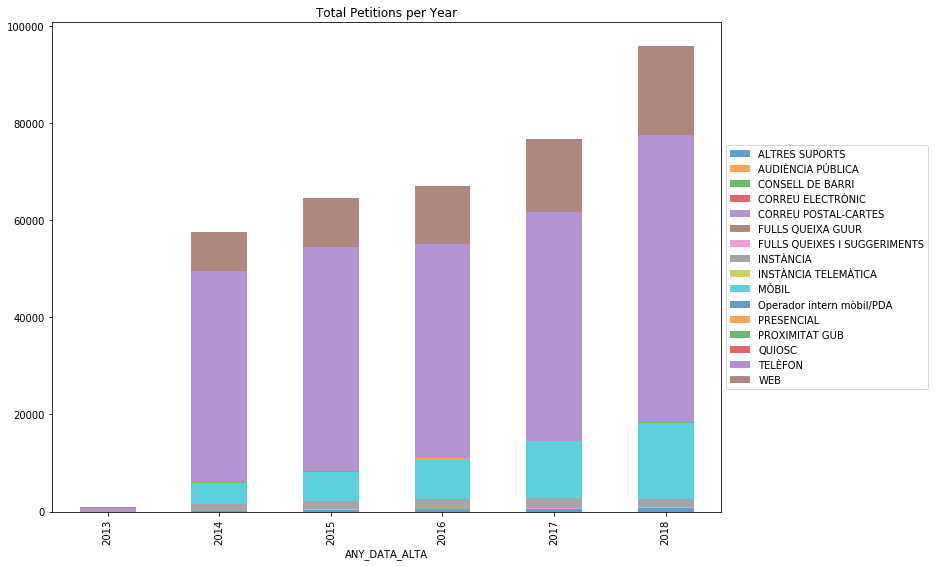

In [56]:
%matplotlib inline 
import matplotlib.pylab as plt

plot1 = pivot_any4.plot(kind='bar',style='b', stacked =True, alpha=0.7,title = "Total Petitions per Year", figsize=(12,9))
plot1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.savefig("Totalvalue_Country.png",dpi= 300, bbox_inches='tight')
plt.show()

## 10) Canals Reposta Analysis

In [26]:
new_data['CANALS_RESPOSTA'].value_counts()

EMAIL              215473
NO VOL RESPOSTA     81802
SMS                 62151
IMMEDIATA           53044
CARTA               19195
TELEFÒNIC              80
Name: CANALS_RESPOSTA, dtype: int64

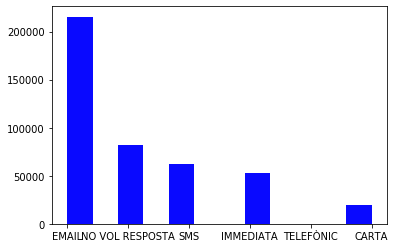

In [27]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

x = new_data['CANALS_RESPOSTA']
num_bins = 12
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=10)
plt.show()

In [58]:
new_data['freq5'] = new_data.groupby('CANALS_RESPOSTA')['CANALS_RESPOSTA'].transform('count')
pivot_any5 = pd.pivot_table(new_data, 'freq5', 'ANY_DATA_ALTA', 'CANALS_RESPOSTA', aggfunc='count')
pivot_any5

C:\Users\alex1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


CANALS_RESPOSTA,CARTA,EMAIL,IMMEDIATA,NO VOL RESPOSTA,SMS,TELEFÒNIC
ANY_DATA_ALTA,,,,,,
2013,76.0,473.0,79.0,179.0,130.0,NaN
2014,2536.0,22897.0,8205.0,14908.0,9071.0,2.0
2015,2639.0,28524.0,8874.0,13516.0,11135.0,11.0
2016,2631.0,32379.0,8309.0,13493.0,10217.0,21.0
2017,2544.0,39012.0,8424.0,14638.0,12058.0,22.0
2018,2324.0,49231.0,10520.0,18342.0,15603.0,15.0


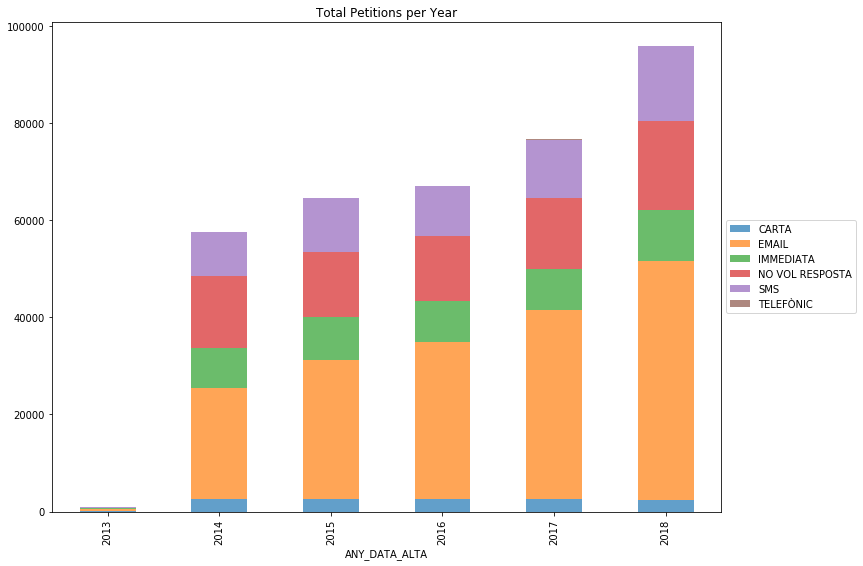

In [59]:
%matplotlib inline 
import matplotlib.pylab as plt

plot1 = pivot_any5.plot(kind='bar',style='b', stacked =True, alpha=0.7,title = "Total Petitions per Year", figsize=(12,9))
plot1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.savefig("Totalvalue_Country.png",dpi= 300, bbox_inches='tight')
plt.show()

## 11) Check what kind of answers there per each type of petition

In [60]:
new_data[new_data.TIPUS == 'PETICIO DE SERVEI']['ELEMENT'].value_counts()

Series([], Name: ELEMENT, dtype: int64)

In [61]:
new_data[new_data.TIPUS == 'QUEIXA']['ELEMENT'].value_counts()

Neteja carrers i/o places                                 14041
Altres obres a la via pública                              6858
Molèsties soroll a la via pública                          6684
Vehicles a motor                                           5120
Recollida de mobles i trastos vells                        2441
Oficina de protecció dels animals                          1857
Bicicletes                                                 1562
Recollida comercial                                        1528
Voreres                                                    1278
Arbrat                                                     1206
Personal de neteja                                         1115
Parcs jardins i zones verdes                               1055
Recollida brossa domiciliària                               796
Parcs, jardins i zones verdes                               777
Salut ambiental i qualitat de l'aire                        675
Nadal                                   

In [62]:
new_data[new_data.TIPUS == 'INCIDENCIA']['ELEMENT'].value_counts()

Neteja carrers i/o places                    54574
Arbrat                                       35617
Enllumenat públic                            27098
Voreres                                      26740
Servei de vigilància i control de plagues    17505
                                             ...  
Senyalitzacions                                 56
Túnels                                          53
Opis / pirulis                                  51
Nadal                                           25
Zona bus                                        24
Name: ELEMENT, Length: 65, dtype: int64

In [33]:
new_data[new_data.TIPUS == 'SUGGERIMENT']['ELEMENT'].value_counts()

Recollida brossa domiciliària                        6604
Ordenació viària                                     3340
Bicicletes                                           3063
Semàfors                                             2195
Recollida comercial                                  2073
Recollida brossa neta                                2069
Voreres                                              2034
Enllumenat públic                                    1875
Autobusos TMB                                        1852
Pilones                                              1657
Senyalització vertical trànsit                       1598
Bancs                                                1396
Altres projectes urbanístics a la ciutat             1158
Papereres                                            1084
Senyalització horitzontal trànsit                    1058
Zona gossos                                           980
Calçada                                               853
Jocs infantils

# B) Numerical Data Analysis

In [34]:
# Index:
###'FITXA_ID', 
###'DIA_DATA_ALTA', 'MES_DATA_ALTA', 'ANY_DATA_ALTA',
###'DIA_DATA_TANCAMENT', 'MES_DATA_TANCAMENT', 'ANY_DATA_TANCAMENT',
### 'CODI_DISTRICTE', 'CODI_BARRI', 'SECCIO_CENSAL', 'NUMERO',
###'COORDENADA_X', 'COORDENADA_Y', 'LONGITUD', 'LATITUD'

In [35]:
new_data['DIA_DATA_TANCAMENT'].value_counts()

13    15897
14    15608
7     15455
20    15216
10    15095
22    15017
27    14926
19    14784
9     14744
4     14703
23    14693
17    14508
28    14296
16    14272
18    14221
21    14093
5     13993
15    13992
26    13970
3     13908
29    13874
11    13703
12    13630
8     13432
25    13366
2     13192
30    13015
6     12759
24    12310
1     10905
31     8168
Name: DIA_DATA_TANCAMENT, dtype: int64

In [40]:
new_data['MES_DATA_TANCAMENT'].value_counts()

7     44514
10    42271
9     39647
1     37408
6     37130
3     37042
11    36170
8     33714
2     33414
5     33379
12    29415
4     27641
Name: MES_DATA_TANCAMENT, dtype: int64

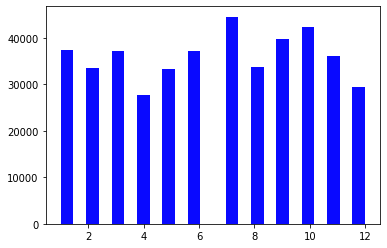

In [42]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

x = new_data['MES_DATA_TANCAMENT']
num_bins = 24
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=10)
plt.show()

In [43]:
new_data['ANY_DATA_TANCAMENT'].value_counts()

2018    108990
2017     85577
2016     75453
2015     72065
2014     64673
2019     24987
Name: ANY_DATA_TANCAMENT, dtype: int64

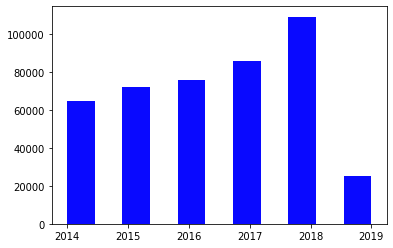

In [48]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

x = new_data['ANY_DATA_TANCAMENT']
num_bins = 11
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=10)
plt.show()

In [49]:
new_data['CODI_DISTRICTE'].value_counts()

10.0    68772
2.0     57070
7.0     52128
3.0     45976
8.0     43126
1.0     39707
5.0     38364
6.0     34149
9.0     33729
4.0     18724
Name: CODI_DISTRICTE, dtype: int64

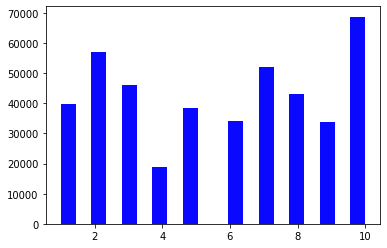

In [51]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

x = new_data['CODI_DISTRICTE']
num_bins = 20
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=10)
plt.show()

In [52]:
new_data['CODI_BARRI'].value_counts()

31.0    14519
7.0     14163
1.0     13713
60.0    12651
18.0    11870
        ...  
47.0     1057
12.0      905
56.0      720
58.0      646
42.0      487
Name: CODI_BARRI, Length: 73, dtype: int64

In [53]:
new_data['SECCIO_CENSAL'].value_counts()

42.0     6670
43.0     6381
1.0      5595
24.0     5560
53.0     5341
         ... 
237.0     229
154.0     228
161.0     192
156.0     167
162.0     149
Name: SECCIO_CENSAL, Length: 181, dtype: int64

In [54]:
new_data['COORDENADA_X'].value_counts()

3.249566e+07    576
4.274712e+05    294
2.899495e+07    197
2.847375e+07    190
4.323570e+05    182
               ... 
4.335343e+05      1
2.825624e+07      1
4.321333e+05      1
4.288539e+05      1
3.355488e+07      1
Name: COORDENADA_X, Length: 104534, dtype: int64

In [55]:
new_data['COORDENADA_Y'].value_counts()

8.585706e+07    576
4.580739e+06    294
8.495696e+07    197
8.497729e+07    190
4.584400e+06    182
               ... 
8.500018e+07      1
8.499822e+07      1
8.996079e+07      1
8.995658e+07      1
8.299930e+07      1
Name: COORDENADA_Y, Length: 105478, dtype: int64

In [56]:
new_data['LONGITUD'].value_counts()

2.191080    619
2.132675    294
2.132680    239
2.149300    238
2.143060    234
           ... 
2.159160      1
2.133428      1
2.100173      1
2.169440      1
2.143307      1
Name: LONGITUD, Length: 78769, dtype: int64

In [57]:
new_data['LATITUD'].value_counts()

41.419590    620
41.374905    294
41.411320    261
41.374910    230
41.411180    224
            ... 
41.437942      1
41.385718      1
41.356190      1
41.416466      1
41.422238      1
Name: LATITUD, Length: 77123, dtype: int64

# GEO PANDAS!

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gdp
from shapely.geometry import Point, Polygon

%matplotlib inline

In [46]:
street_map = gdp.read_file('shape/buildings.shp')

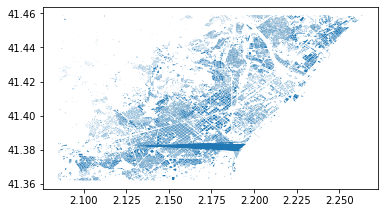

In [47]:
ax = street_map.plot()

In [48]:
street_map2 = gdp.read_file('shape/landuse.shp')

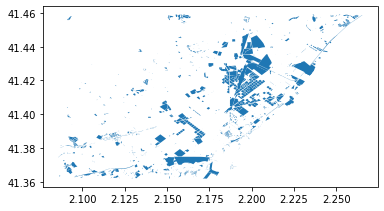

In [49]:
ax = street_map2.plot()

In [50]:
street_map3 = gdp.read_file('shape/natural.shp')

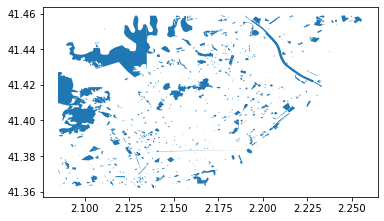

In [51]:
ax = street_map3.plot()

In [52]:
street_map4 = gdp.read_file('shape/places.shp')

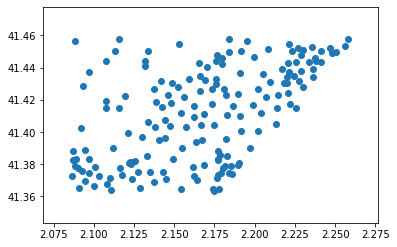

In [53]:
ax = street_map4.plot()

In [54]:
street_map5 = gdp.read_file('shape/points.shp')

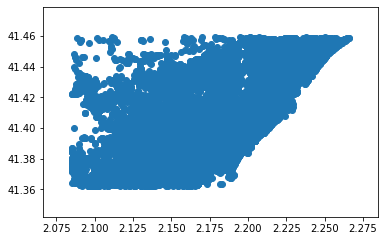

In [55]:
ax = street_map5.plot()

In [56]:
street_map6 = gdp.read_file('shape/railways.shp')

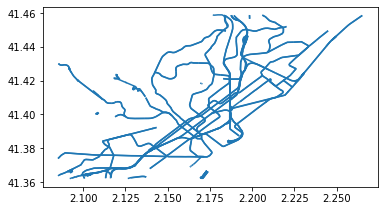

In [57]:
ax = street_map6.plot()

In [58]:
street_map7 = gdp.read_file('shape/roads.shp')

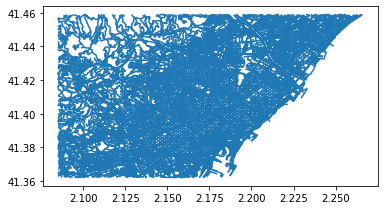

In [59]:
ax = street_map7.plot()

In [61]:
street_map8 = gdp.read_file('shape/waterways.shp')

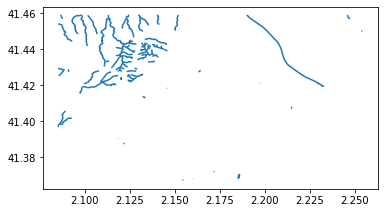

In [62]:
ax = street_map8.plot()

## Geo Pandas dataframe...

In [30]:
street_map = street_map.to_crs({'init': 'epsg:3395'})

In [31]:
geometry = [Point(xy) for xy in zip (new_data['LONGITUD'], new_data['LATITUD'])]
geometry [:5]

In [ ]:
geo_df = gdp.GeoDataFrame(new_data,
                         street_map,
                          geometry = geometry)
geo_df.head()

In [ ]:
fig,ax = plt.subplots (figsize = (15,15))
street_map.plot (ax = ax, alpha = 0.4, color = 'grey')
geo_df[geo_df['WnvPresent']==0].plot(ax = ax, markersize = 20, color = 'blue', marker = 'o', label = 'Neg')
geo_df[geo_df['WnvPresent']==1].plot(ax = ax, markersize = 20, color = 'red', marker = 'o', label = 'Pos')
plt.legend(prop={'size':15})

# Altair...

In [1]:
import pandas as pd
import altair as alt
from vega_datasets import data